<a href="https://colab.research.google.com/github/NiceNewton/NiceNewton/blob/main/YOUTUBETREANDING_VIDEOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [16]:
df = pd.read_csv("CAvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [17]:
df["description"] = df["description"].fillna(value="")

In [18]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.00,40881.00,40881.00,40881.00,40881.00
mean,20.80,1147035.91,39582.69,2009.20,5042.97
std,6.78,3390913.02,132689.53,19008.37,21579.02
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143902.00,2191.00,99.00,417.00
50%,24.00,371204.00,8780.00,303.00,1301.00
75%,24.00,963302.00,28717.00,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


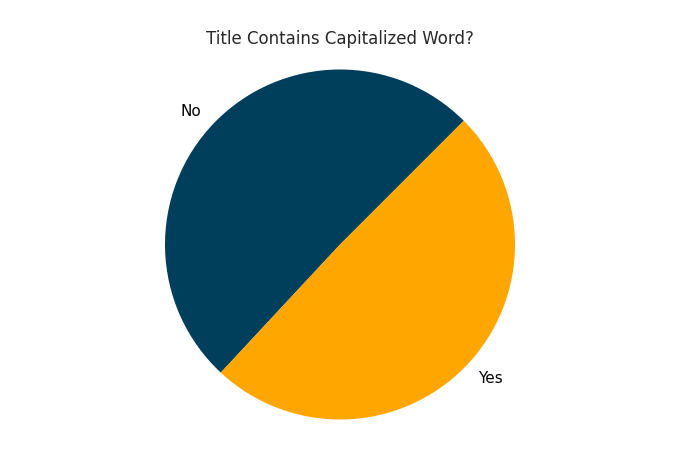

In [19]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

<ipython-input-20-e6d651d6430c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


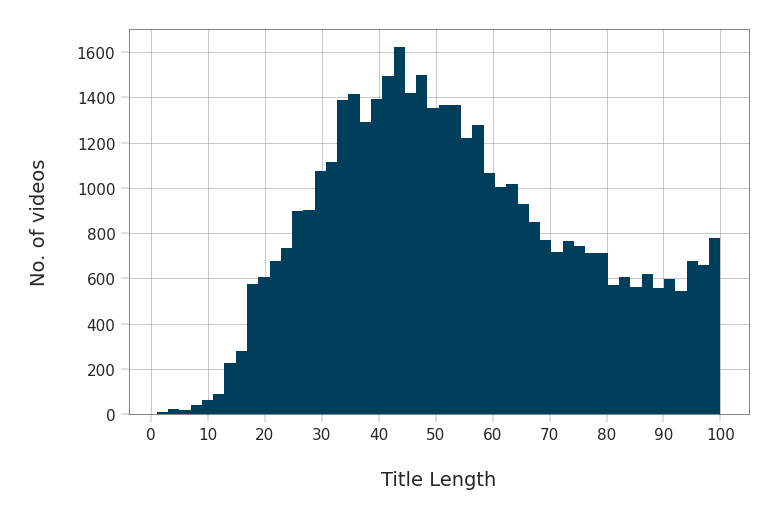

In [20]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

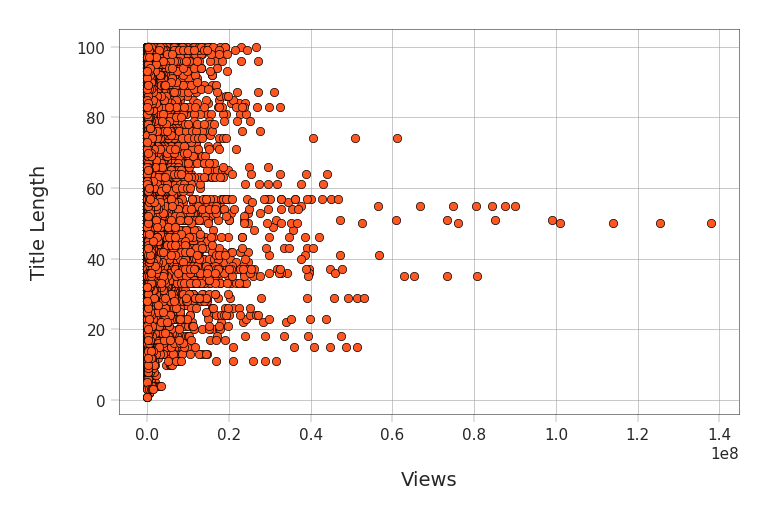

In [21]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

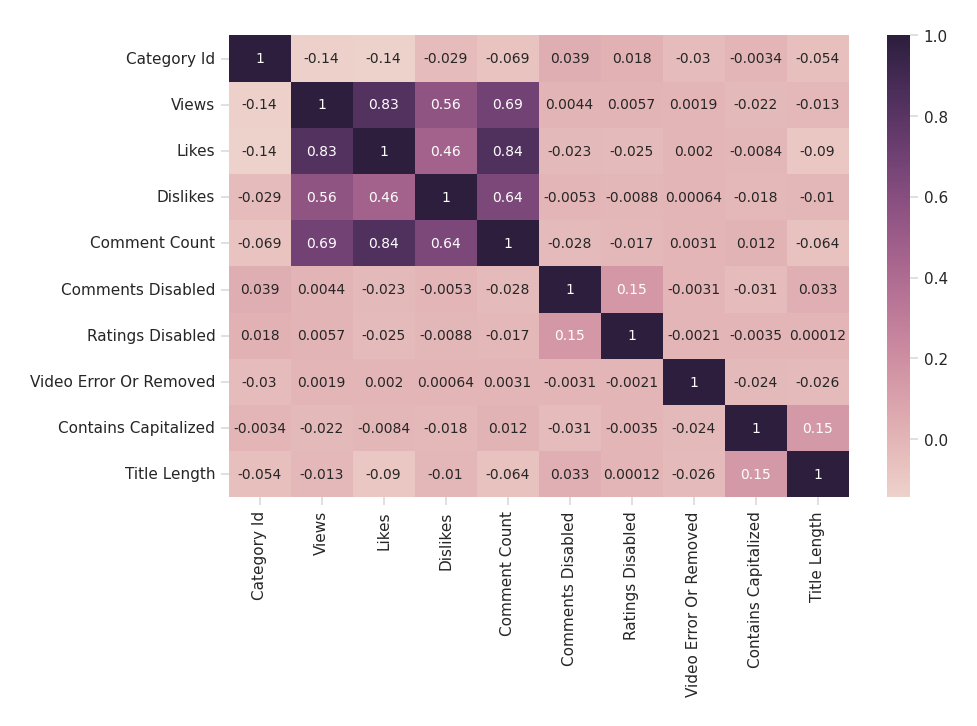

In [28]:
numerical_df = df.select_dtypes(include=['number', 'bool'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Generate the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(corr_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels,
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

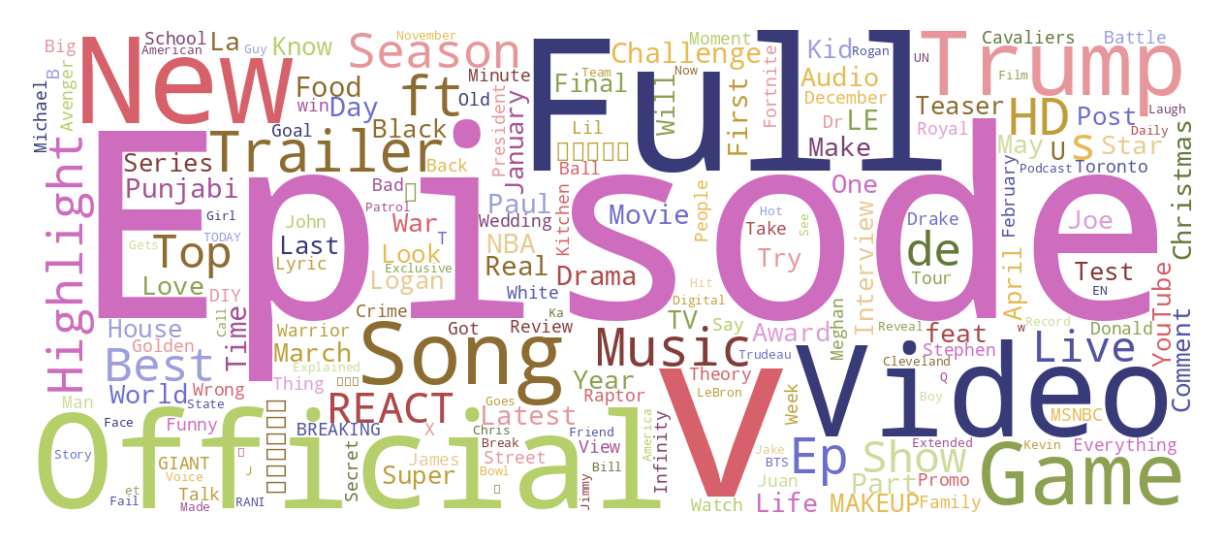

In [29]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")